# Problem Statement

This project aims to understand how students' performance, specifically their test scores, is influenced by various variables such as Gender, Ethnicity, Parental Level of Education, Lunch, and Test Preparation Course. The objective is to analyze a dataset and uncover patterns or correlations that provide insights into the relationship between these variables and students' academic outcomes.

## Data Collection

The dataset used in this project is obtained from Kaggle, a platform for data science and machine learning. The dataset comprises 8 columns and 1000 rows, with each row representing a unique student and each column representing a different attribute or variable. The data includes information on the marks secured by students in various subjects.

Dataset Source: [Kaggle - Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)

The dataset source link indicates that the data might have been generated or curated for educational and analytical purposes. Kaggle is a popular platform where data scientists and researchers share and collaborate on datasets, and it often serves as a valuable resource for conducting analyses and building models.

## Additional Considerations

1. **Variables of Interest:**
   - The project focuses on specific variables:
      - **Gender:** Analyzing if there are performance differences between male and female students.
      - **Ethnicity:** Investigating variations in performance based on students' ethnic backgrounds.
      - **Parental Level of Education:** Examining the influence of parents' education levels on students' scores.
      - **Lunch:** Understanding if the type of lunch students receive is correlated with academic performance.
      - **Test Preparation Course:** Analyzing whether students who completed a test preparation course perform differently from those who did not.

2. **Exploratory Data Analysis (EDA):**
   - The project involves conducting EDA to visualize and summarize the main characteristics of the dataset. This includes creating histograms, box plots, or other visualizations to understand the distribution of test scores and other variables.

3. **Statistical Analysis:**
   - Statistical analyses, such as correlation tests or hypothesis testing, may be conducted to quantify relationships observed during EDA. This helps validate findings and draw meaningful conclusions about the factors influencing students' performance.

4. **Modeling (Possibly):**
   - Depending on the goals, there might be a possibility of building predictive models to understand the predictive power of different variables on students' test scores. Machine learning algorithms could be employed for this purpose.

In summary, this project not only seeks to explore relationships between various factors and students' performance but also aims to derive insights that could potentially inform educational policies or interventions. The combination of exploratory data analysis, statistical analysis, and possibly modeling contributes to a comprehensive understanding of the dataset and its implications.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the Data

In [2]:
df = pd.read_csv('data/student.csv')

df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

# Dataset Information

The dataset contains information on students' academic performance with the following columns:

- **gender:** Sex of students (Male/Female)
- **race/ethnicity:** Ethnicity of students (Group A, B, C, D, E)
- **parental level of education:** Parents' final education (Bachelor's degree, Some college, Master's degree, Associate's degree, High school)
- **lunch:** Whether students had lunch before the test (Standard or Free/Reduced)
- **test preparation course:** Completion status of the test preparation course before the test (Complete or Not Complete)
- **math score**
- **reading score**
- **writing score**

## Data Checks to Perform

1. **Check Missing Values:**
   - Examine the dataset for any missing values in any of the columns.

2. **Check Duplicates:**
   - Identify and handle any duplicate rows in the dataset.

3. **Check Data Type:**
   - Ensure that the data types of each column are appropriate (e.g., numeric for scores, categorical for gender).

4. **Check the Number of Unique Values:**
   - Explore the dataset to determine the number of unique values present in each column. This is particularly useful for understanding the diversity of categorical variables.

5. **Check Statistics of Dataset:**
   - Examine basic statistics for the dataset, including measures such as mean, median, and standard deviation for numerical columns.

6. **Check Various Categories in Categorical Columns:**
   - For categorical columns like 'gender,' 'race/ethnicity,' 'parental level of education,' 'lunch,' and 'test preparation course,' inspect the different categories es_preparation = df['test preparation course'].value_counts()


In [4]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
print(df.value_counts())

gender  race_ethnicity  parental_level_of_education  lunch         test_preparation_course  math_score  reading_score  writing_score
female  group A         associate's degree           free/reduced  none                     37          57             56               1
male    group C         associate's degree           standard      completed                57          54             56               1
                                                     free/reduced  completed                60          51             56               1
                                                                                            65          67             65               1
                                                                                                        73             68               1
                                                                                                                                       ..
female  group D         associate's deg

In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- **Central Tendency:**
  - The mean (average) scores for the subjects are around 66.09 for math, 69.17 for reading, and 68.05 for writing.

- **Variability:**
  - Scores exhibit variability around the mean, as indicated by standard deviations of approximately 15.16 (math), 14.60 (reading), and 15.20 (writing).

- **Range:**
  - The scores vary widely, with the minimum scores being 0 (math), 17 (reading), and 10 (writing), and maximum scores reaching 100 for all subjects.

- **Distribution Spread:**
  - Quartiles provide insights into the distribution spread. For example, the 25th percentile (first quartile) for math is 57, indicating that 25% of students scored 57 or below.

- **Median (50th Percentile):**
  - The median scores (50th percentile) represent the middle point of the data, with values of 66 (math), 70 (reading), and 69 (writing).


In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Feature extraction

In [10]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = round(df['total score']/3, 2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [11]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [12]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


- **Full Marks Achieved:**
  - There are 7 students who scored full marks in Maths, 14 in Writing, and 17 in Reading.

- **Scores Below 20:**
  - A smaller number of students, 4 in Maths, 3 in Writing, and 1 in Reading, scored less than 20 marks in each respective subject.


### Visualization 

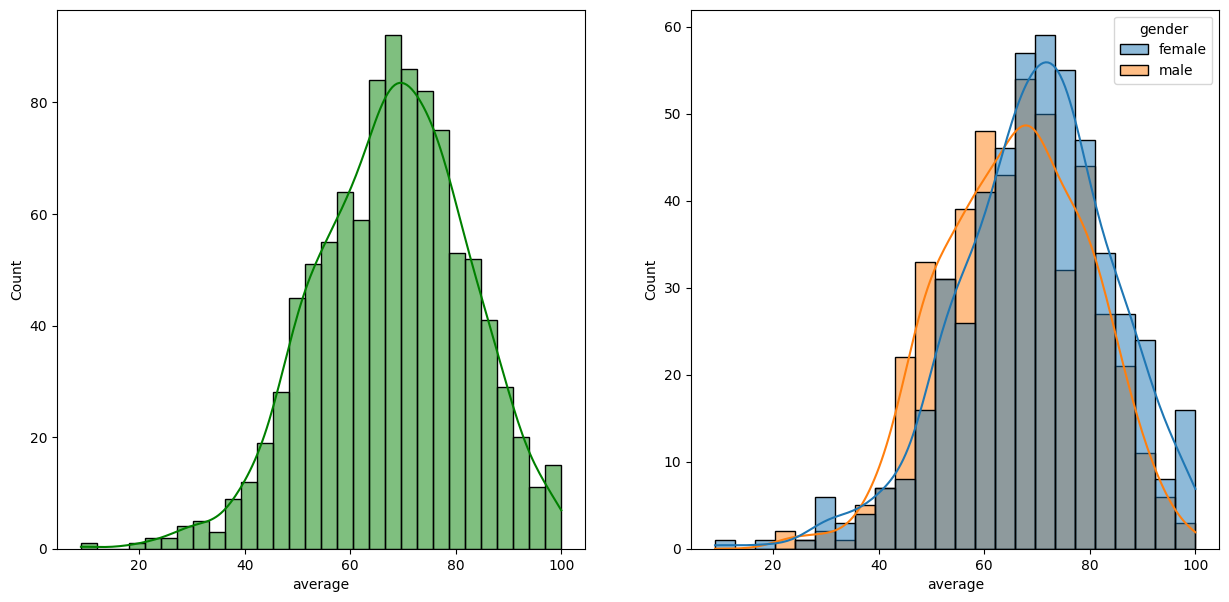

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

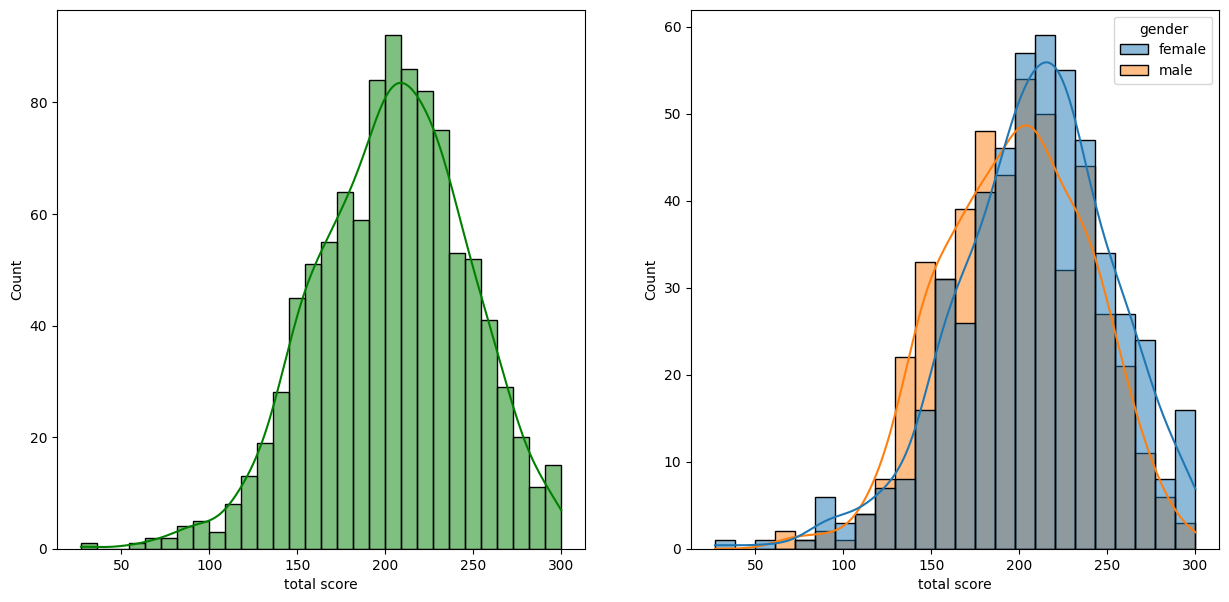

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


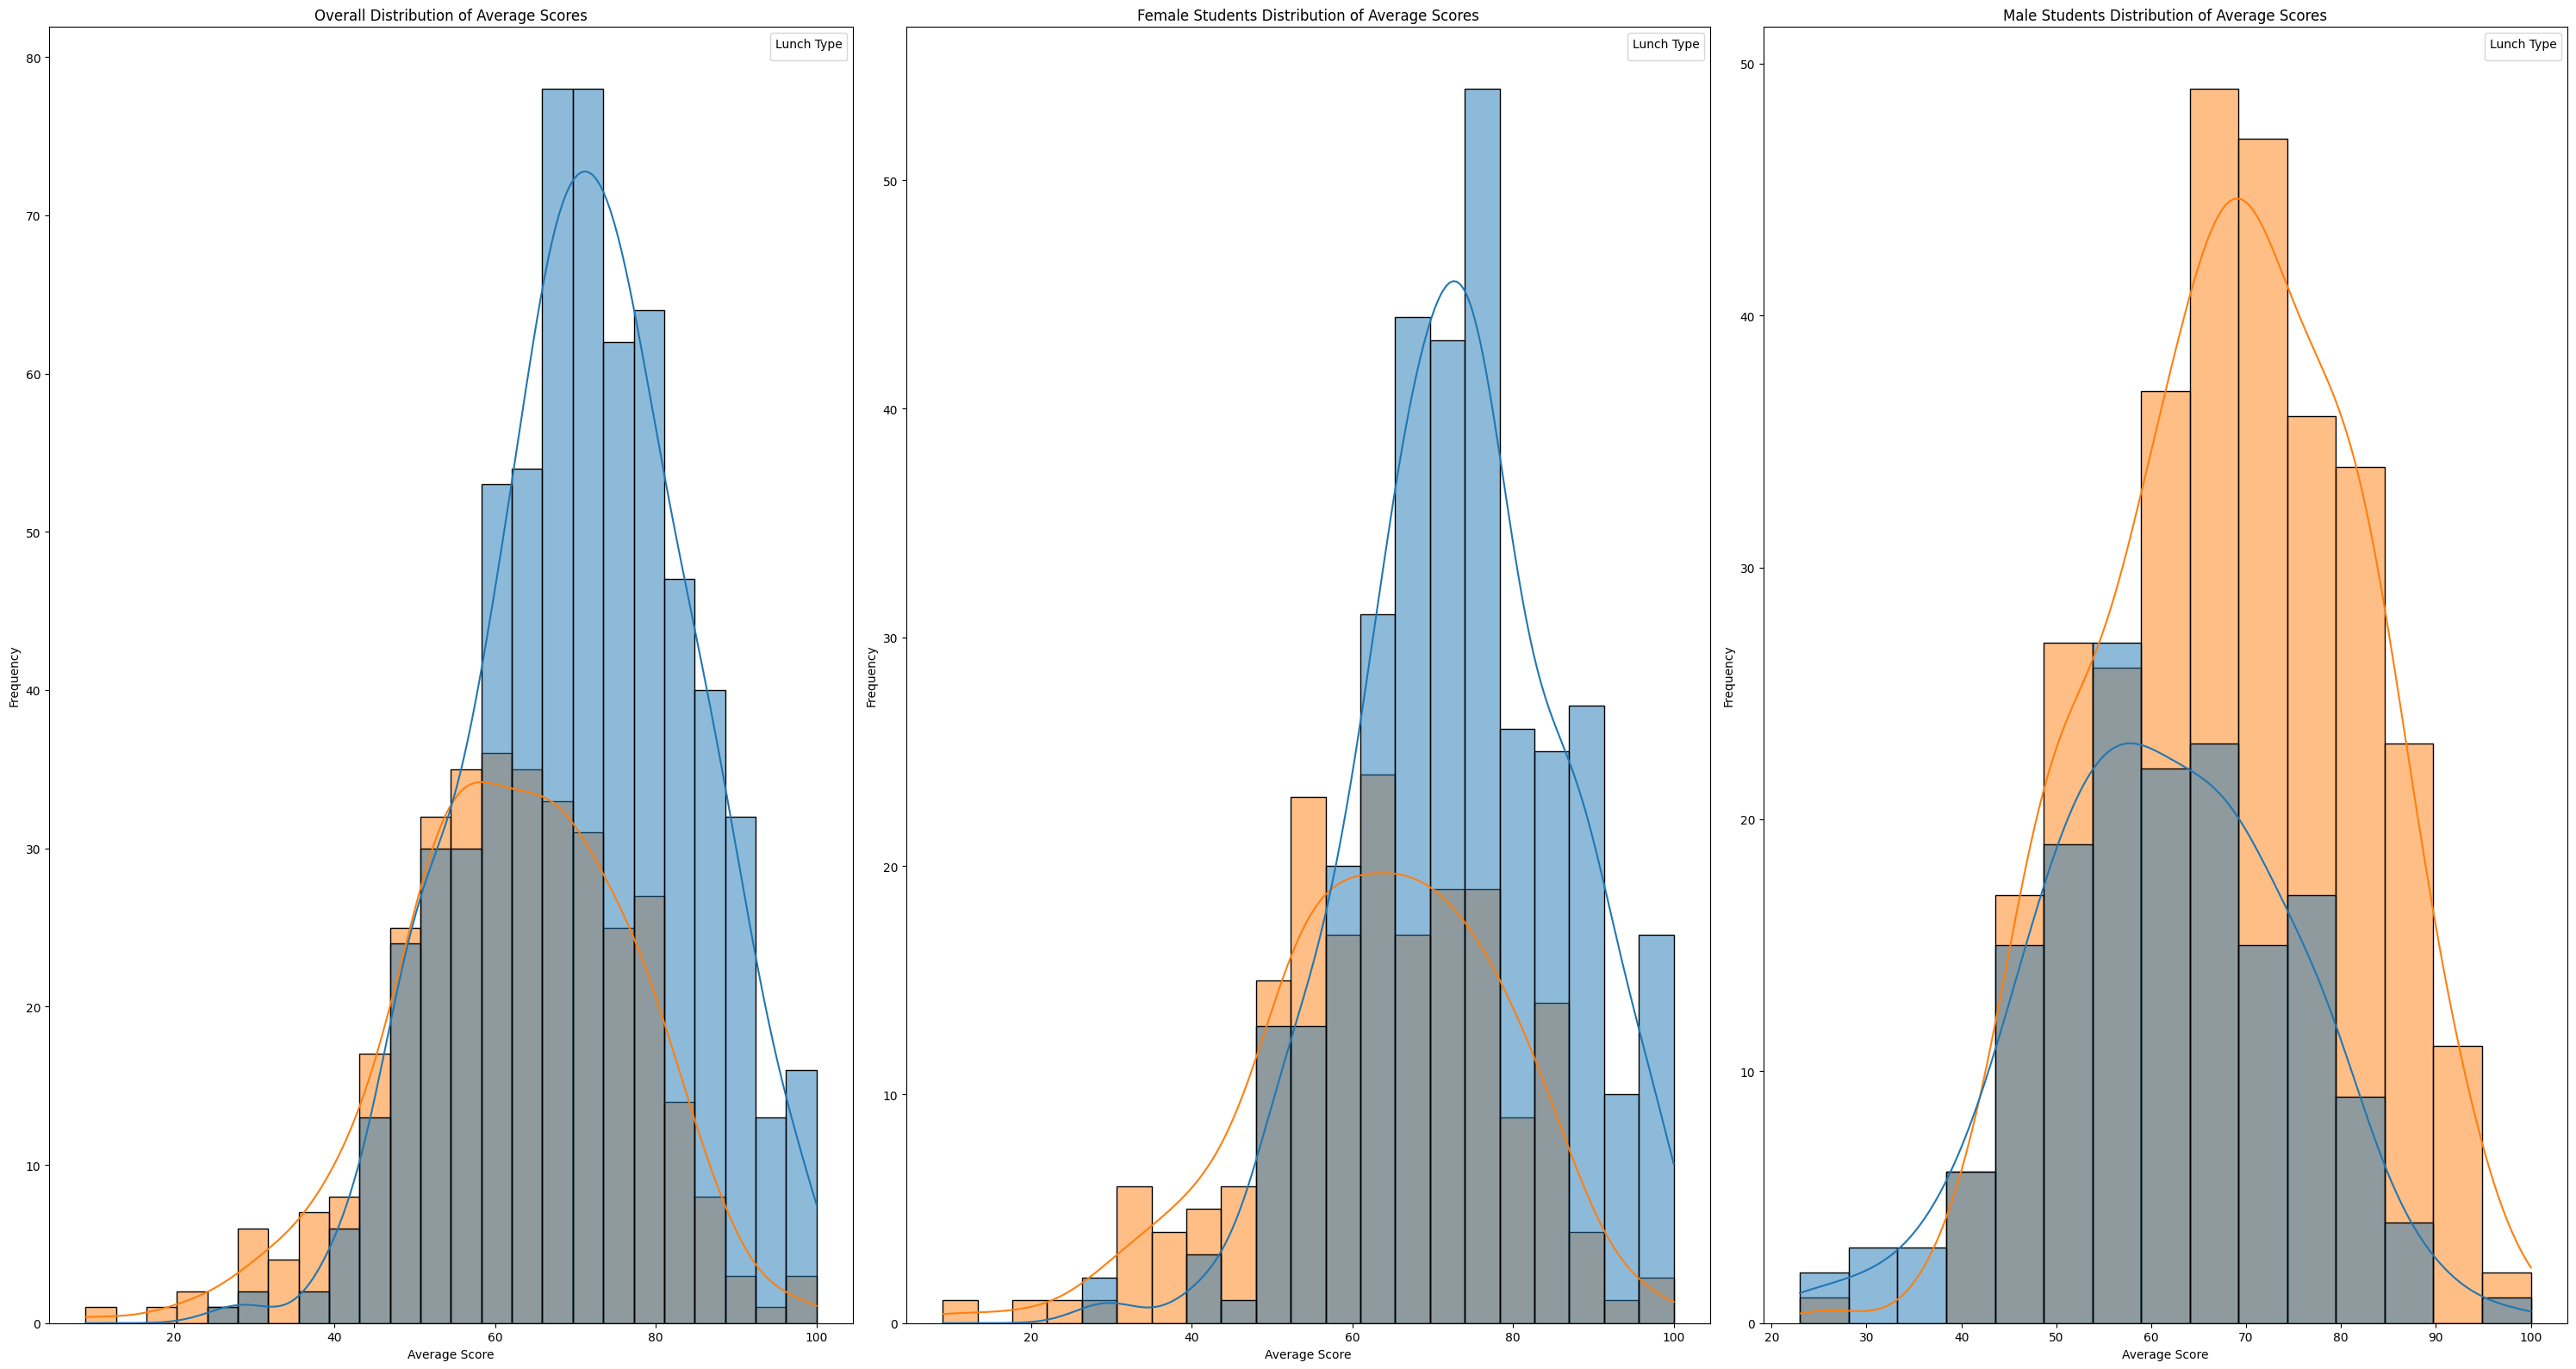

In [29]:
# Set the figure size
plt.figure(figsize=(30, 16))

# Subplot 1: Overall Distribution
plt.subplot(131)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title('Overall Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.legend(title='Lunch Type')

# Subplot 2: Female Distribution
plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.title('Female Students Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.legend(title='Lunch Type')

# Subplot 3: Male Distribution
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')
plt.title('Male Students Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.legend(title='Lunch Type')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Insights

1. **Gender Performance:**
   - Female students tend to outperform male students in exams.

2. **Lunch Influence:**
   - Students having a standard lunch show better performance in exams.

3. **Gender-Neutral Lunch Influence:**
   - The positive impact of a standard lunch on exam performance is observed across both male and female students.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


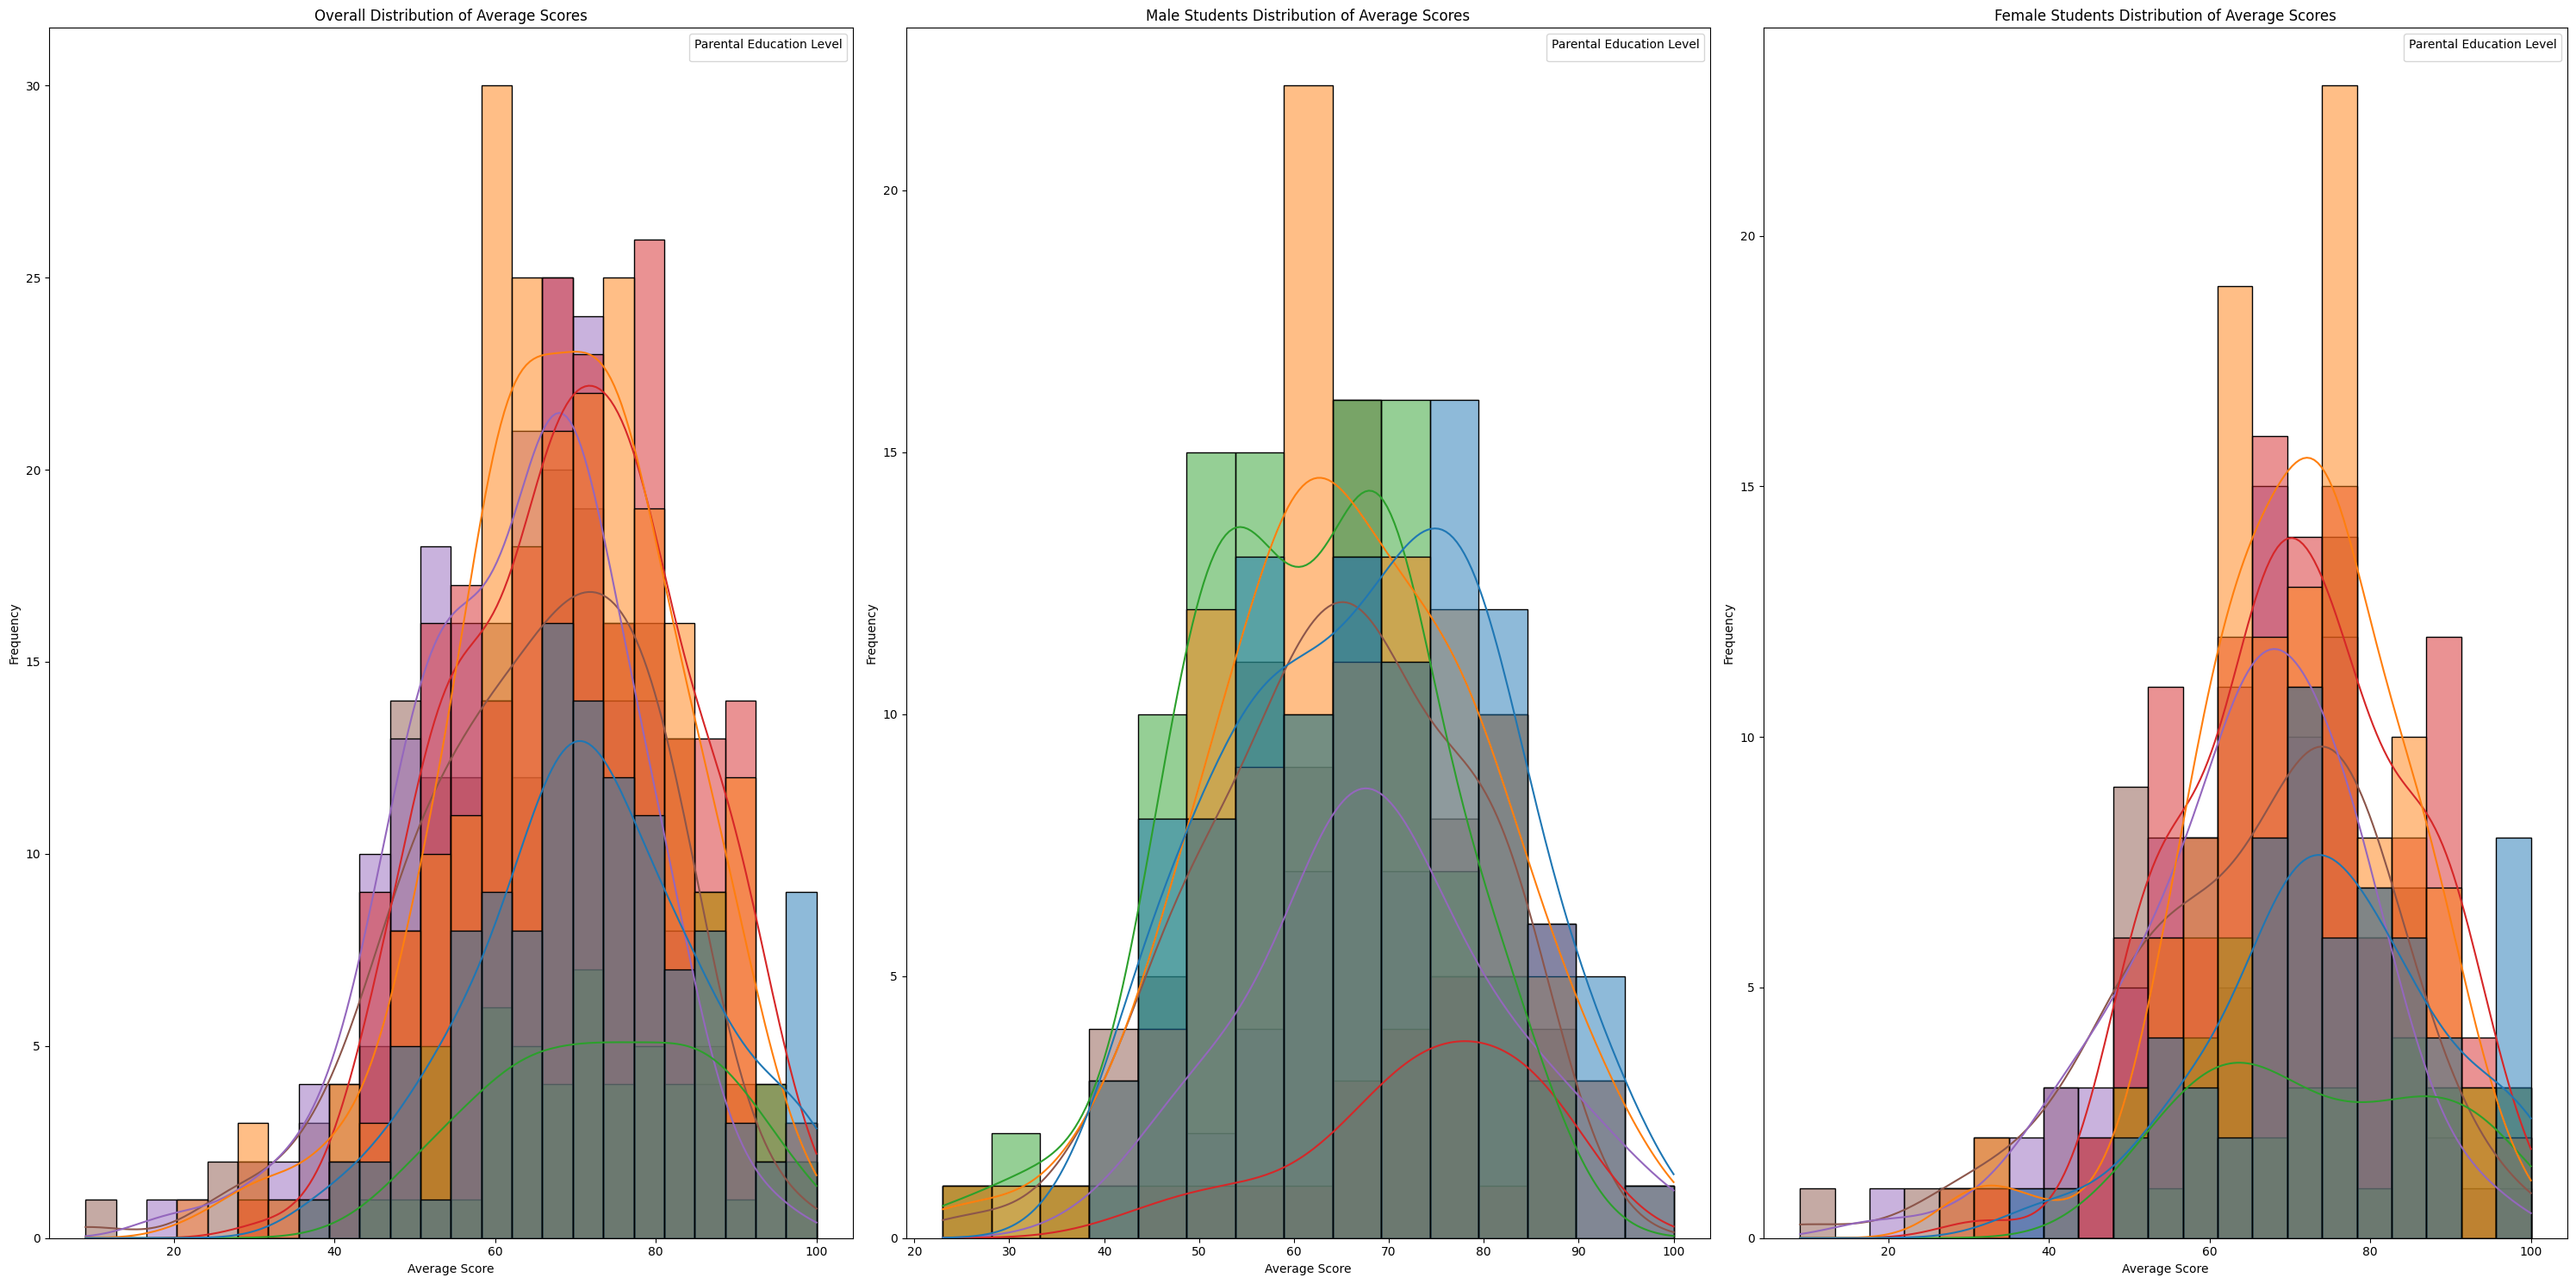

In [27]:

# Set the figure size
plt.figure(figsize=(30, 15))

# Subplot 1: Overall Distribution
plt.subplot(131)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.title('Overall Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.legend(title='Parental Education Level')

# Subplot 2: Male Distribution
plt.subplot(132)
ax = sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental_level_of_education')
plt.title('Male Students Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.legend(title='Parental Education Level')

# Subplot 3: Female Distribution
plt.subplot(133)
ax = sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental_level_of_education')
plt.title('Female Students Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.legend(title='Parental Education Level')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


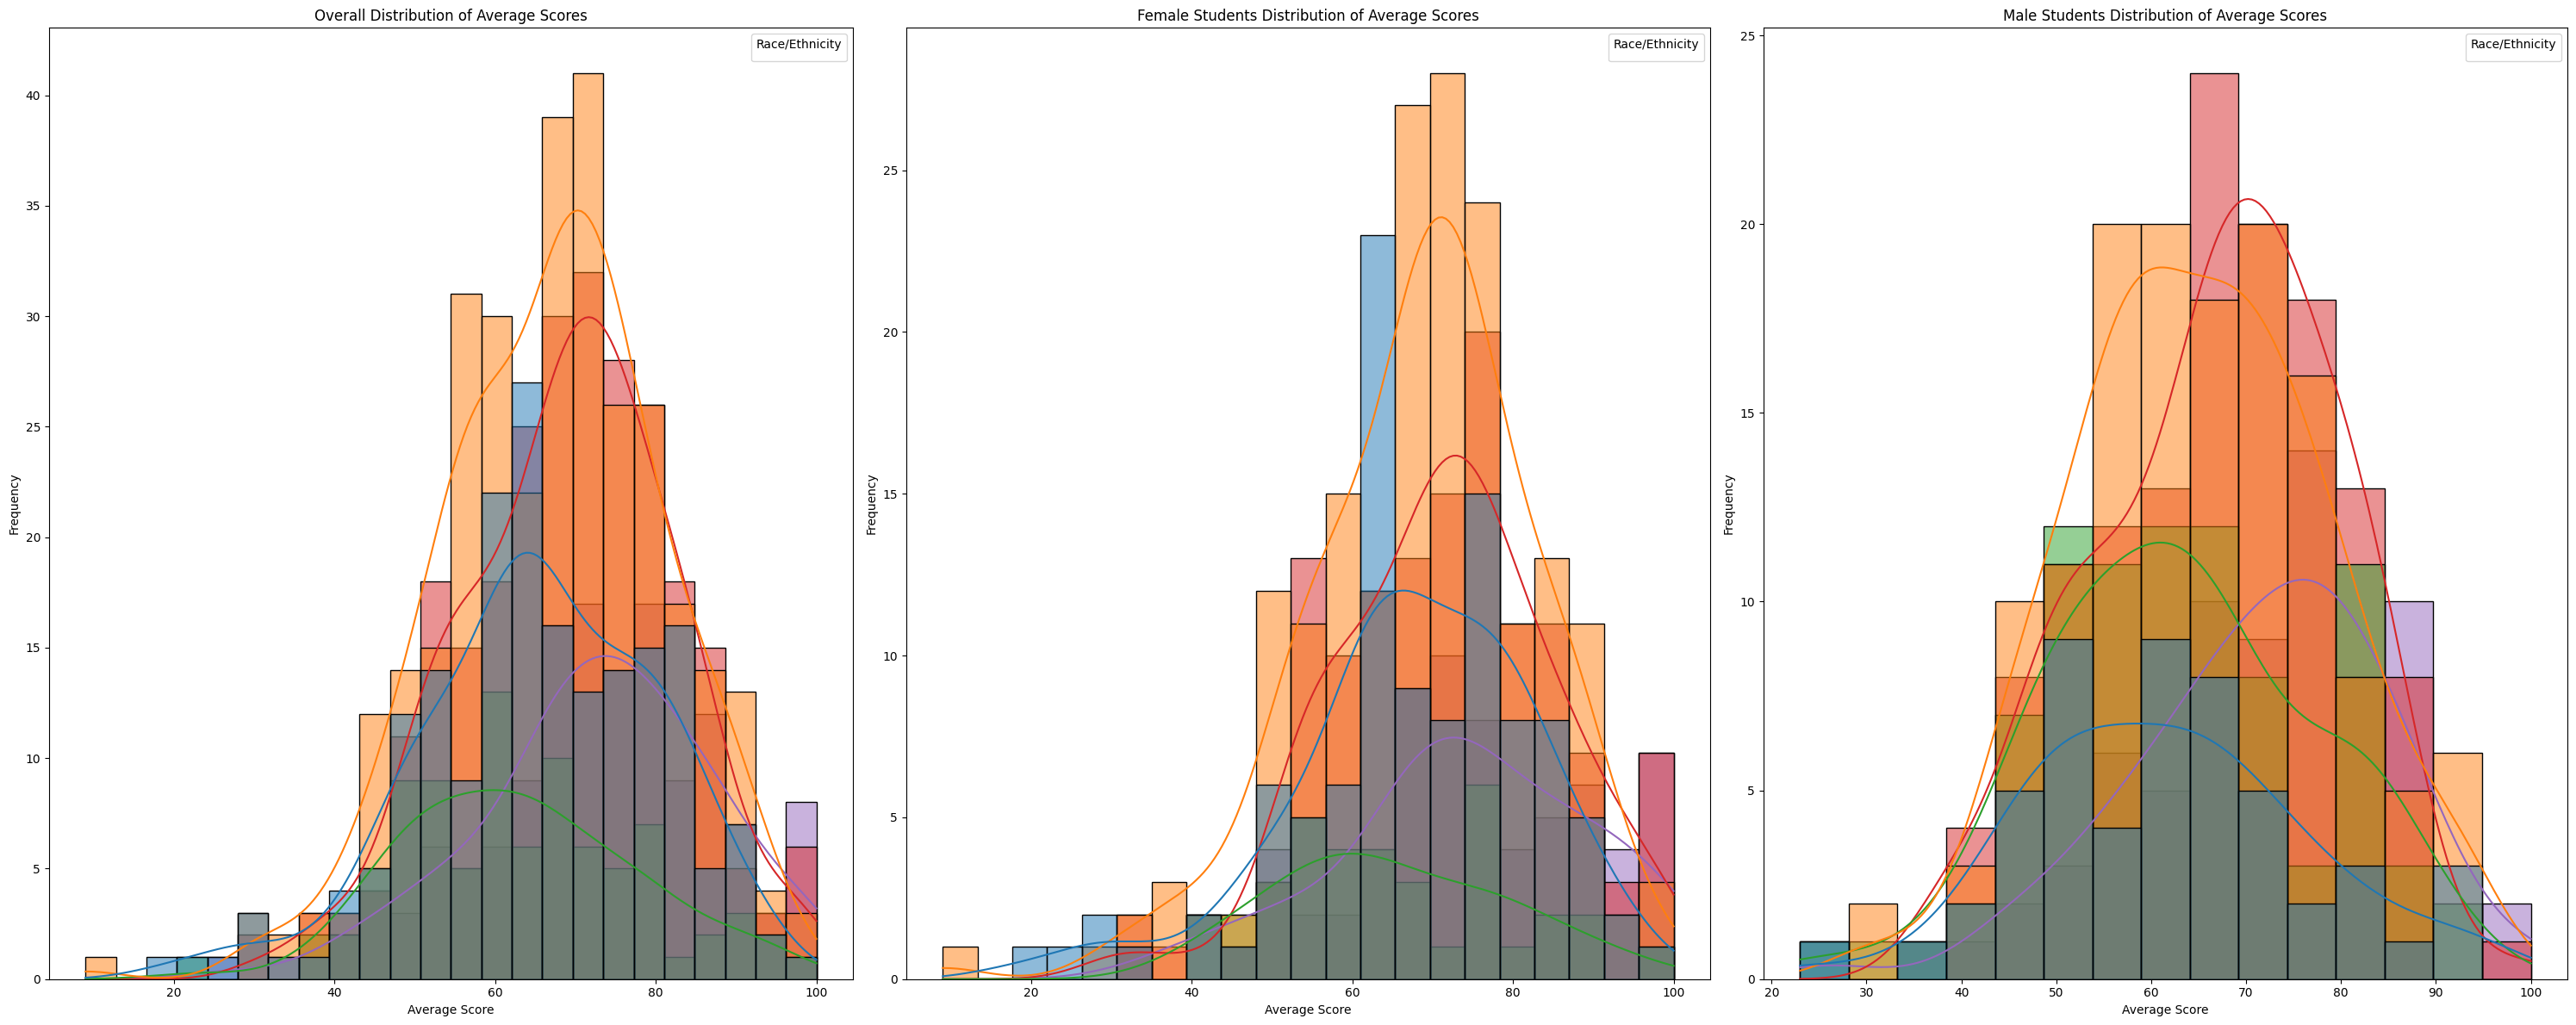

In [28]:
# Set the figure size
plt.figure(figsize=(30, 12))

# Subplot 1: Overall Distribution
plt.subplot(131)
ax = sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.title('Overall Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.legend(title='Race/Ethnicity')

# Subplot 2: Female Distribution
plt.subplot(132)
ax = sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race_ethnicity')
plt.title('Female Students Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.legend(title='Race/Ethnicity')

# Subplot 3: Male Distribution
plt.subplot(133)
ax = sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race_ethnicity')
plt.title('Male Students Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.legend(title='Race/Ethnicity')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Insights

1. **Parent's Education Impact:**
   - In general, there is no strong correlation between parent's education level and student performance in exams.

2. **Parent's Education Influence on Male Students:**
   - The second plot reveals that male students with parents holding associate's or master's degrees tend to perform well in exams.

3. **No Effect on Female Students:**
   - In the third plot, there is no apparent effect of parent's education on the performance of female students.

## Insights

1. **Performance by Ethnicity:**
   - Students belonging to groups A and B exhibit lower performance in exams.

2. **Consistency Across Genders:**
   - The second insight indicates that the performance trend is consistent, with both male and female students from groups A and B performing poorly in exams.


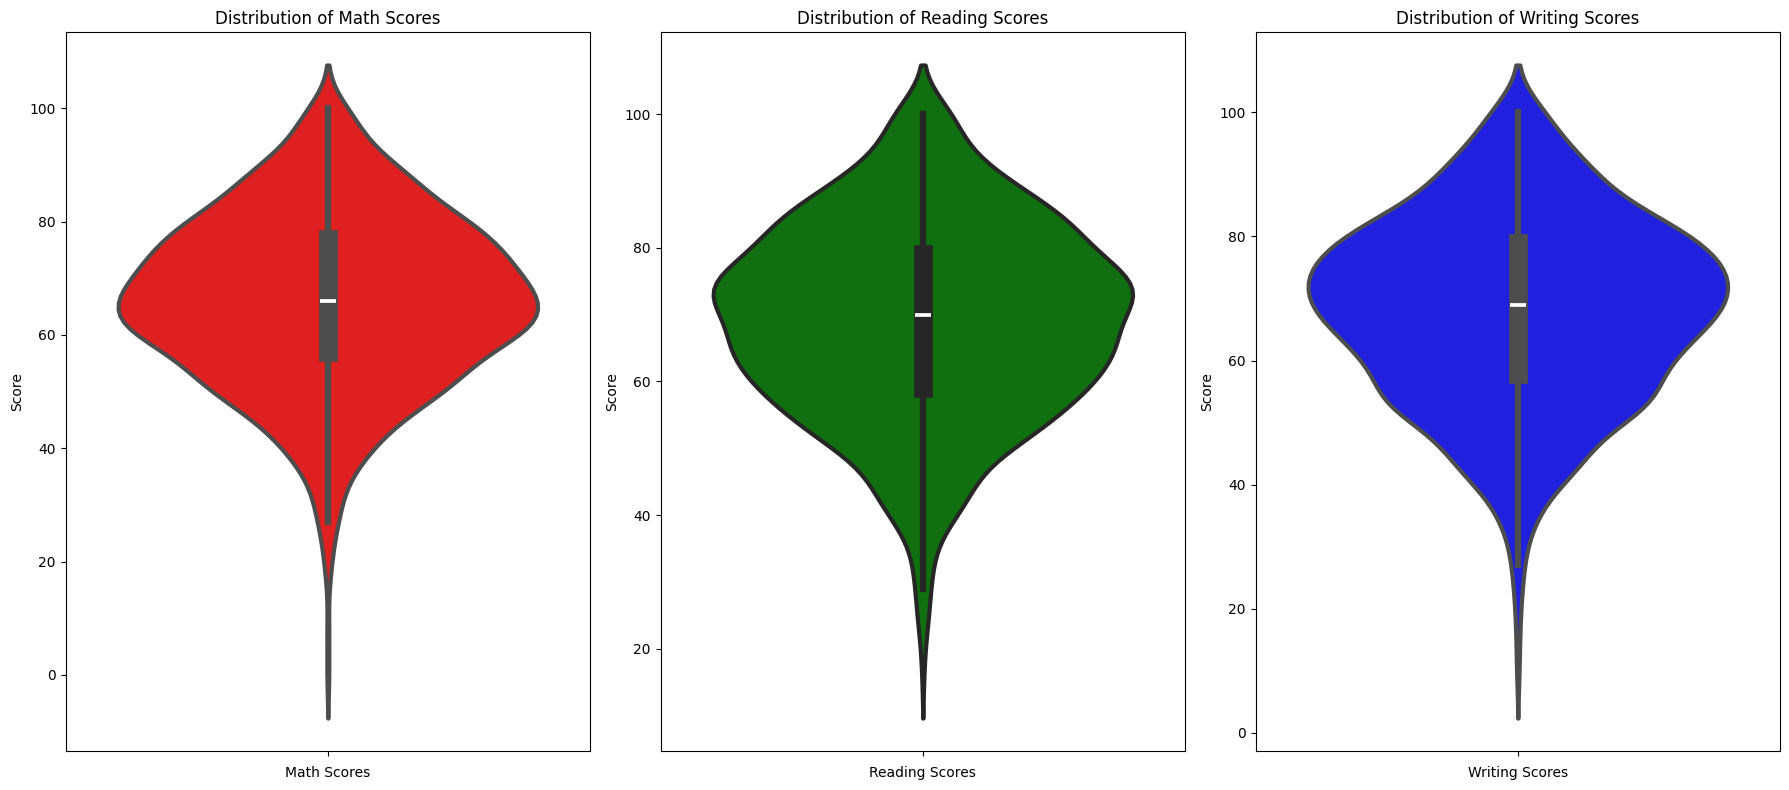

In [30]:
# Set the figure size
plt.figure(figsize=(18, 8))

# Subplot 1: Math Scores
plt.subplot(1, 3, 1)
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Scores')
plt.ylabel('Score')

# Subplot 2: Reading Scores
plt.subplot(1, 3, 2)
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Scores')
plt.ylabel('Score')

# Subplot 3: Writing Scores
plt.subplot(1, 3, 3)
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Scores')
plt.ylabel('Score')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Insights

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

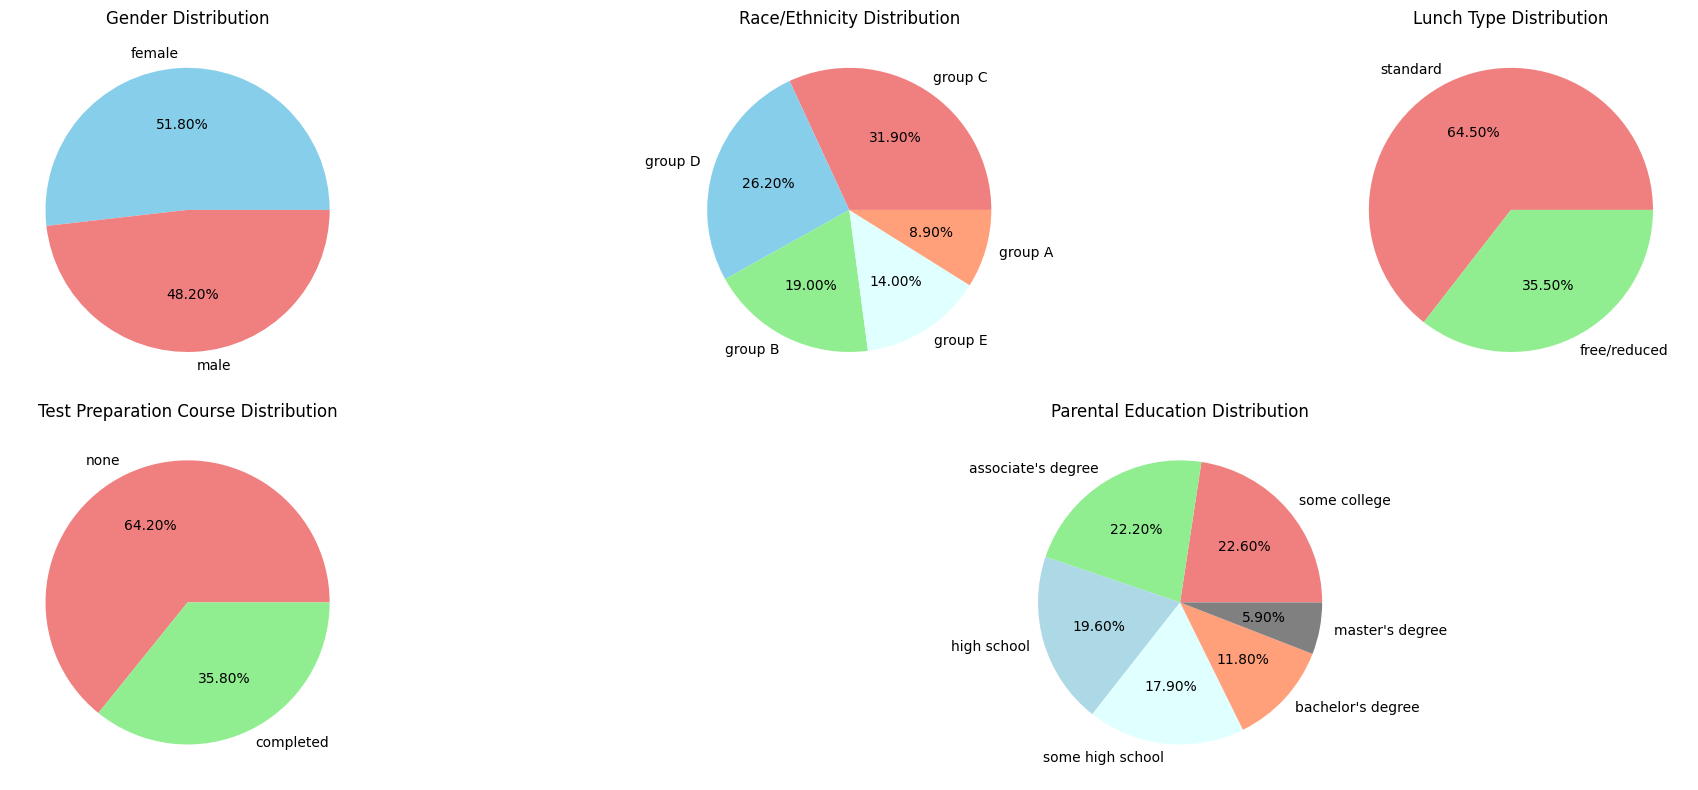

In [23]:
# Set the figure size
plt.figure(figsize=(20, 8))

# Define subplot grid
grid_size = (2, 3)

# Subplot 1: Gender
plt.subplot2grid(grid_size, (0, 0))
gender_counts = df['gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%.2f%%', colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution')

# Subplot 2: Race/Ethnicity
plt.subplot2grid(grid_size, (0, 1))
race_counts = df['race_ethnicity'].value_counts()
plt.pie(race_counts, labels=race_counts.index, autopct='%.2f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'lightcyan', 'lightsalmon'])
plt.title('Race/Ethnicity Distribution')

# Subplot 3: Lunch
plt.subplot2grid(grid_size, (0, 2))
lunch_counts = df['lunch'].value_counts()
plt.pie(lunch_counts, labels=lunch_counts.index, autopct='%.2f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Lunch Type Distribution')

# Subplot 4: Test Preparation Course
plt.subplot2grid(grid_size, (1, 0))
test_prep_counts = df['test_preparation_course'].value_counts()
plt.pie(test_prep_counts, labels=test_prep_counts.index, autopct='%.2f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Test Preparation Course Distribution')

# Subplot 5: Parental Education
plt.subplot2grid(grid_size, (1, 1), colspan=2)
parent_edu_counts = df['parental_level_of_education'].value_counts()
plt.pie(parent_edu_counts, labels=parent_edu_counts.index, autopct='%.2f%%', colors=['lightcoral', 'lightgreen', 'lightblue', 'lightcyan', 'lightsalmon', 'grey'])
plt.title('Parental Education Distribution')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## Insights

1. **Gender Distribution:**
   - The number of male and female students is almost equal.

2. **Ethnicity Distribution:**
   - The highest number of students belong to Group C.

3. **Lunch Type:**
   - The majority of students have a standard lunch.

4. **Test Preparation Course Enrollment:**
   - A larger number of students have not enrolled in any test preparation course.

5. **Parental Education Distribution:**
   - The highest number of students have parental education classified as "Some College," followed closely by "Associate's Degree."


### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

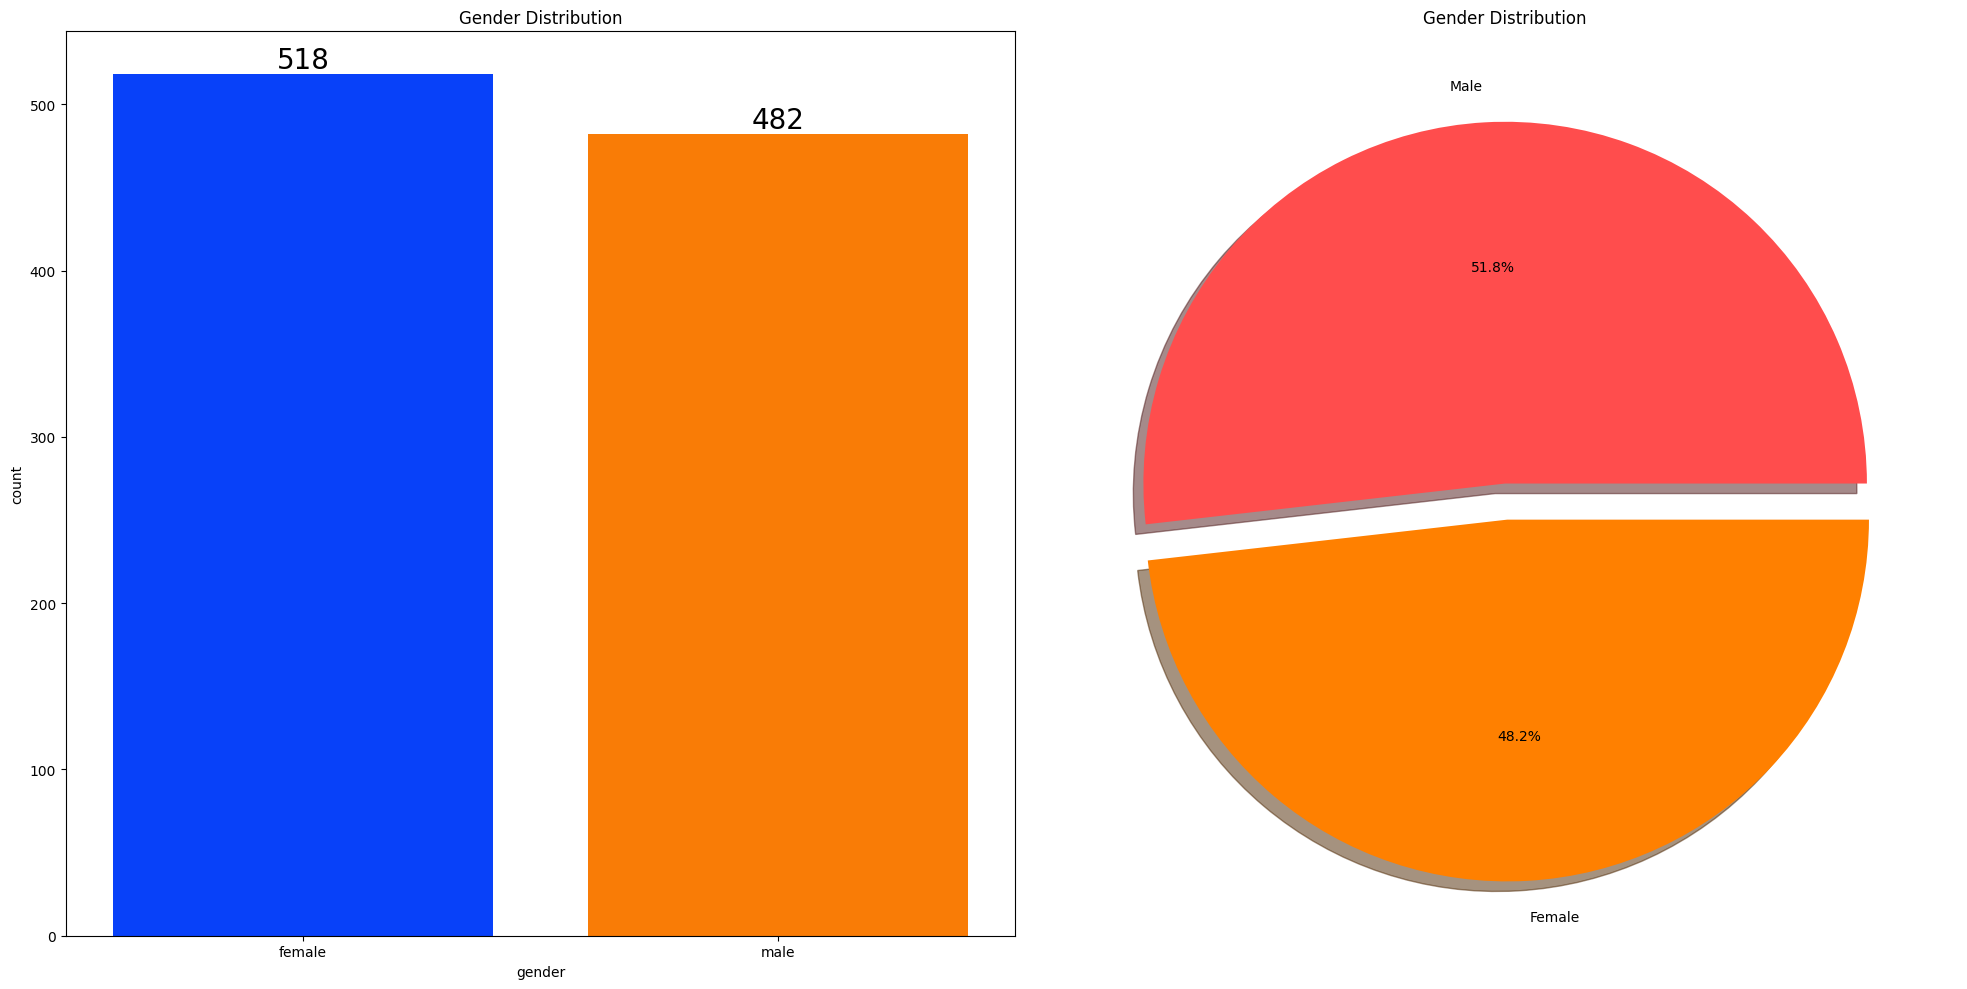

In [31]:
# Set the figure size
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot for Gender Distribution
sns.countplot(x='gender', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
ax[0].set_title('Gender Distribution')

# Pie chart for Gender Distribution
colors = ['#ff4d4d', '#ff8000']
explode = [0, 0.1]
gender_counts = df['gender'].value_counts()
ax[1].pie(gender_counts, labels=['Male', 'Female'], explode=explode, autopct='%1.1f%%', shadow=True, colors=colors)
ax[1].set_title('Gender Distribution')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

## Insights- 
Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [38]:
gender_group = df.groupby('gender').agg({
    'math_score': np.mean,
    'reading_score': np.mean,
    'writing_score': np.mean,
    'total score':np.mean,
    'average':np.mean
    
}).reset_index()

gender_group

,gender,math_score,reading_score,writing_score,total score,average
0,female,63.633205,72.608108,72.467181,208.708494,69.569498
1,male,68.728216,65.473029,63.311203,197.512448,65.837303


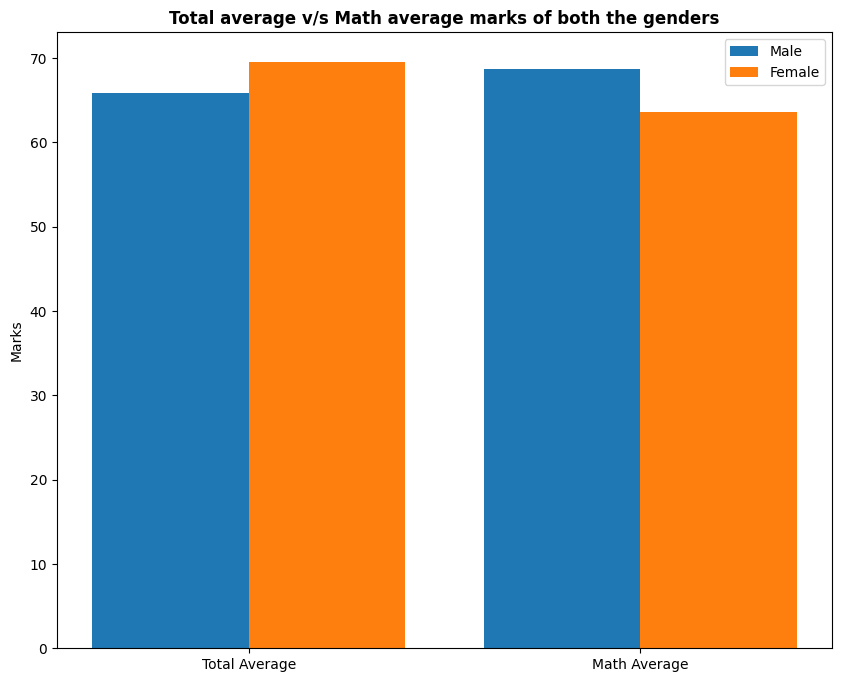

In [40]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

## Insights
- On an average females have a better overall score than men.
- Whereas males have scored higher in Maths

### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

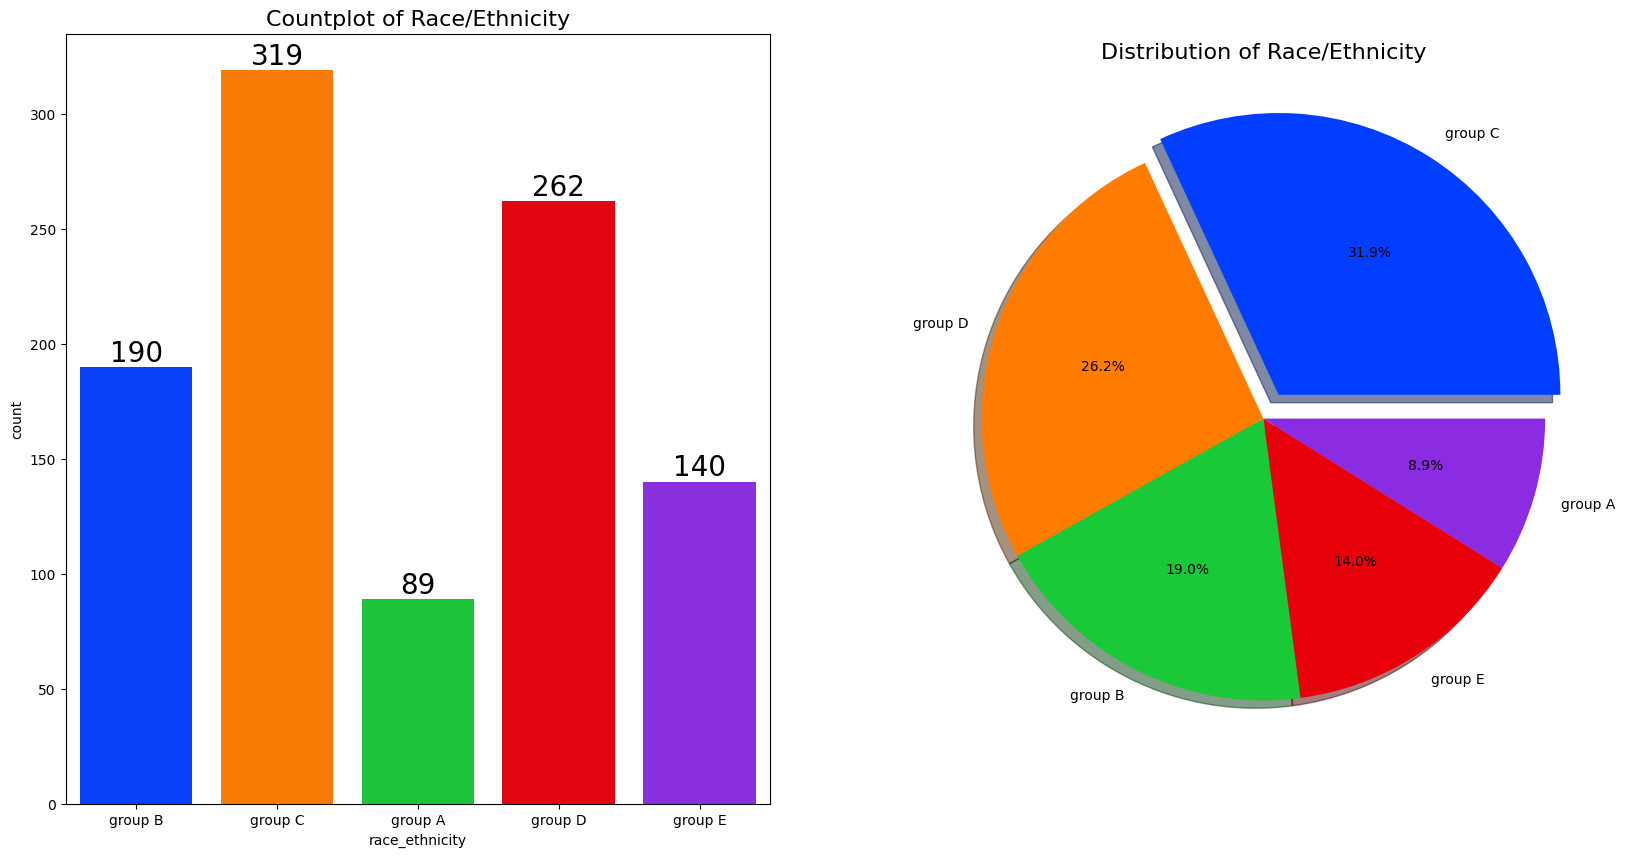

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot countplot
sns.countplot(x='race_ethnicity', data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot pie chart
explode = [0.1, 0, 0, 0, 0]
colors = sns.color_palette('bright')
ax[1].pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index,
          explode=explode, autopct='%1.1f%%', shadow=True, colors=colors)

# Set titles
ax[0].set_title('Countplot of Race/Ethnicity', fontsize=16)
ax[1].set_title('Distribution of Race/Ethnicity', fontsize=16)

# Show the plots
plt.show()
 

### Insights
- Most of the student belonging from group C /group D.- 
Lowest number of students belong to grou p.A

### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

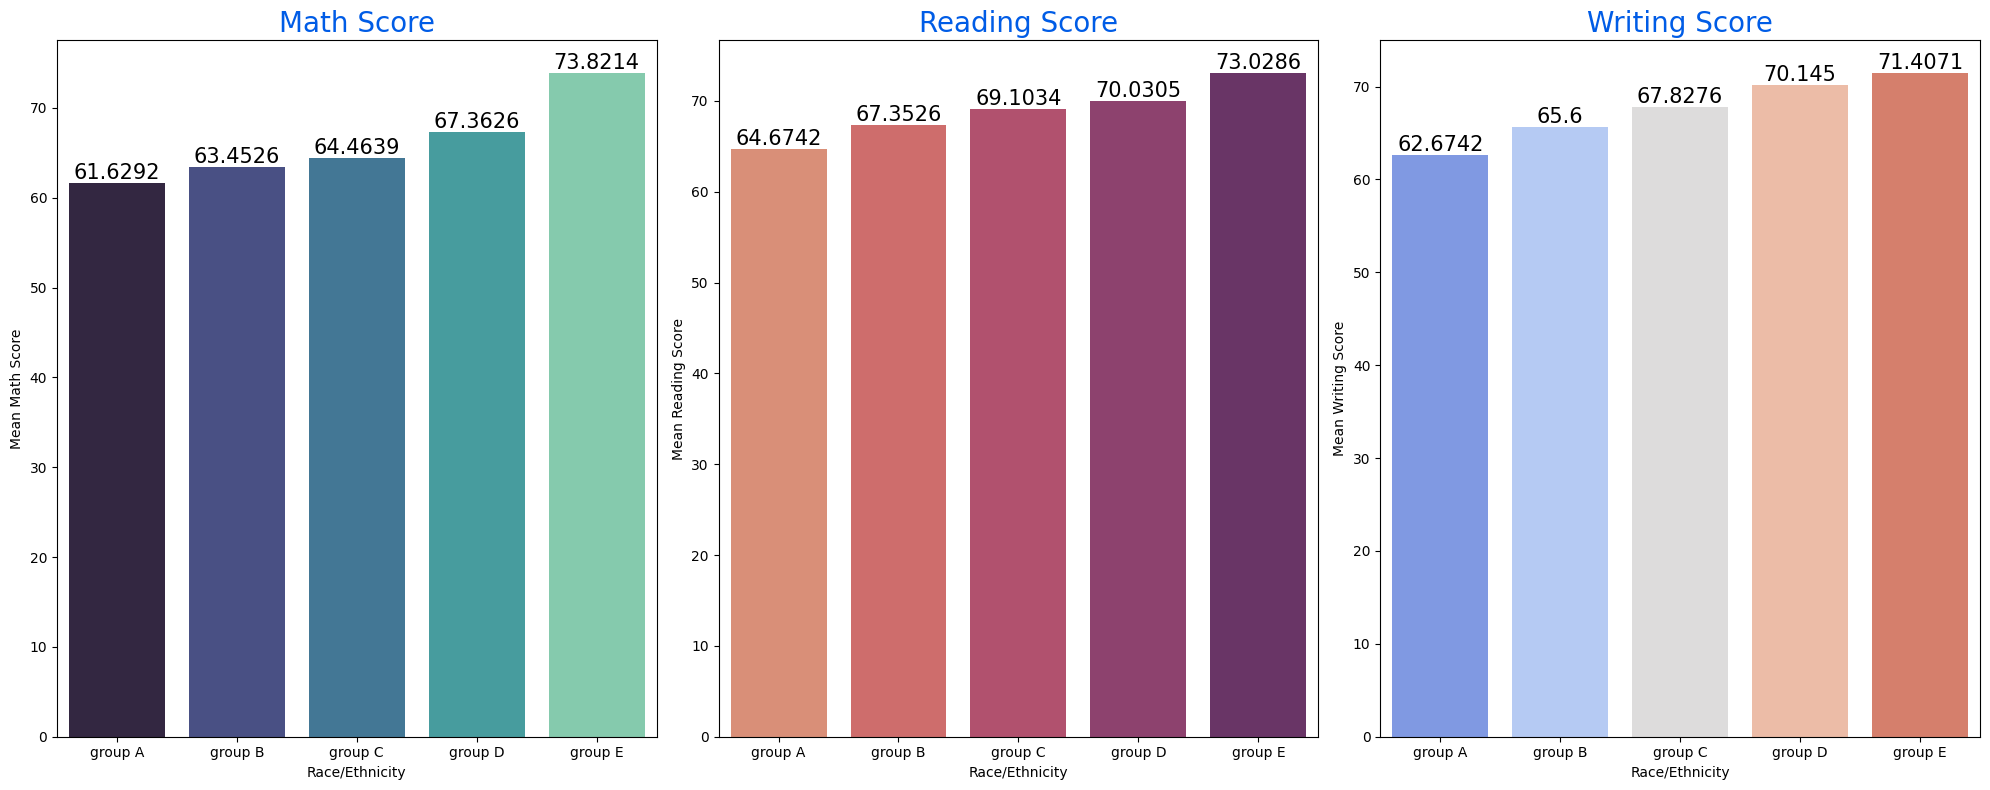

In [47]:
# Group by 'race/ethnicity'
group_data2 = df.groupby('race_ethnicity')

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plotting for Math score
sns.barplot(x=group_data2['math_score'].mean().index, y=group_data2['math_score'].mean().values, palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)
ax[0].set_xlabel('Race/Ethnicity')
ax[0].set_ylabel('Mean Math Score')

# Adding labels to the bars
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plotting for Reading score
sns.barplot(x=group_data2['reading_score'].mean().index, y=group_data2['reading_score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)
ax[1].set_xlabel('Race/Ethnicity')
ax[1].set_ylabel('Mean Reading Score')

# Adding labels to the bars
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Plotting for Writing score
sns.barplot(x=group_data2['writing_score'].mean().index, y=group_data2['writing_score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)
ax[2].set_xlabel('Race/Ethnicity')
ax[2].set_ylabel('Mean Writing Score')

# Adding labels to the bars
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

### Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects.

### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

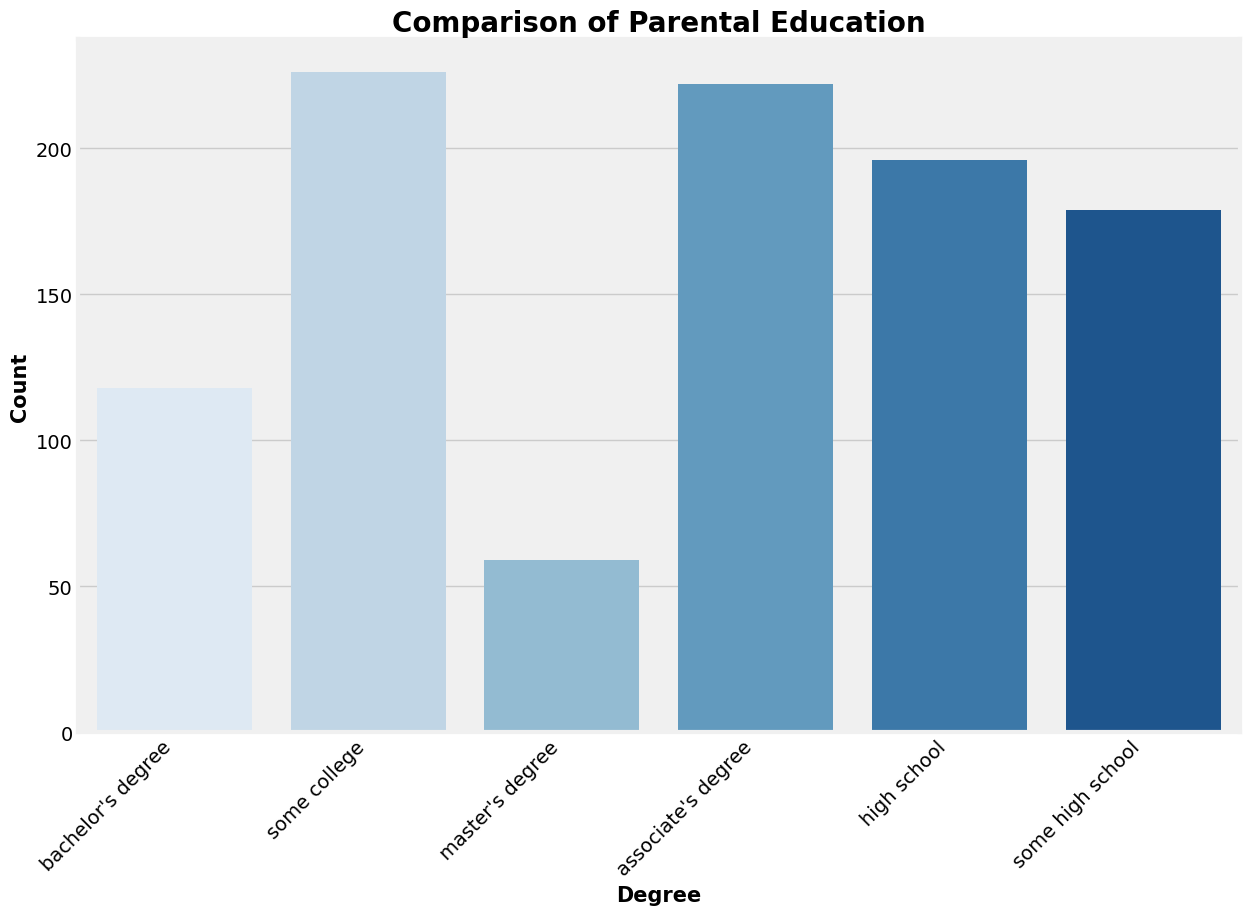

In [48]:
# Set figure size and style
plt.figure(figsize=(15, 9))
plt.style.use('fivethirtyeight')

# Plotting the count of parental education
sns.countplot(x='parental_level_of_education', data=df, palette='Blues')

# Title and labels
plt.title('Comparison of Parental Education', fontweight='bold', fontsize=20)
plt.xlabel('Degree', fontweight='bold', fontsize=15)
plt.ylabel('Count', fontweight='bold', fontsize=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### Insights- 
Largest number of parents are from some college.

### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

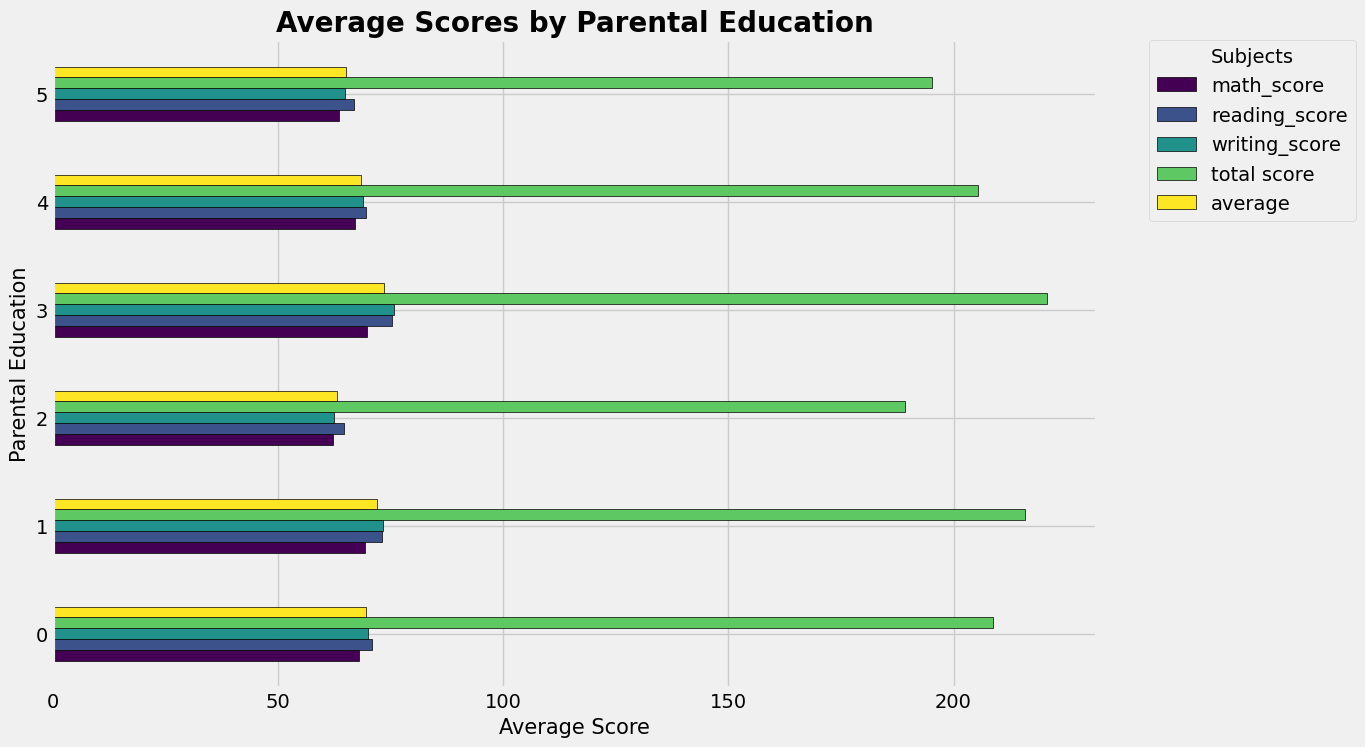

In [50]:
# Group by parental education and calculate the mean, then plot
mean_scores_by_education = df.groupby('parental_level_of_education').agg({
    'math_score': np.mean,
    'reading_score': np.mean,
    'writing_score': np.mean,
    'total score':np.mean,
    'average':np.mean
    
}).reset_index()
mean_scores_by_education.plot(kind='barh', figsize=(12, 8), colormap='viridis', edgecolor='black')

# Title and labels
plt.title('Average Scores by Parental Education', fontsize=20, fontweight='bold')
plt.xlabel('Average Score', fontsize=15)
plt.ylabel('Parental Education', fontsize=15)

# Display the legend outside the plot for better visibility
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Subjects')

# Show the plot
plt.show()

### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

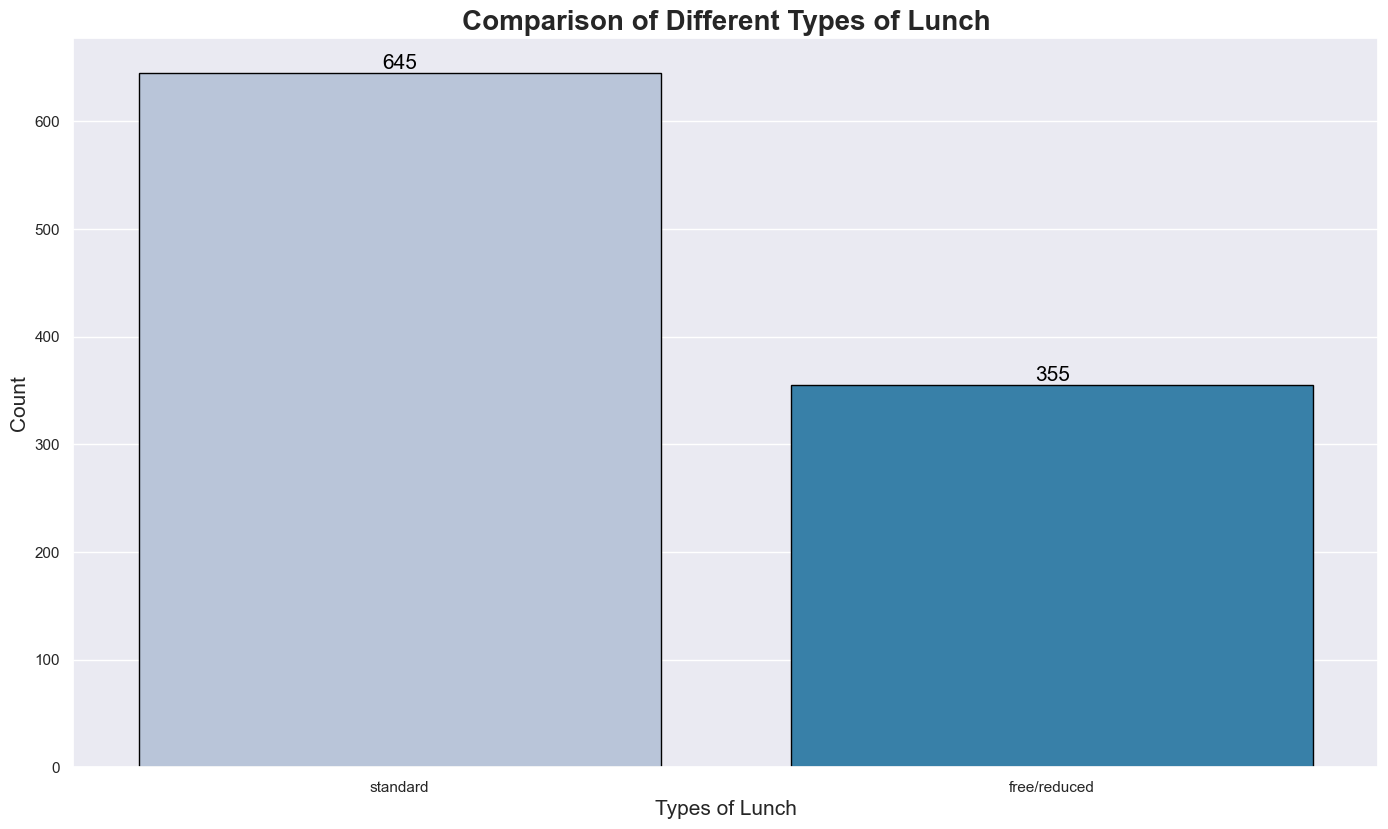

In [52]:
# Set the plotting style and figure size
sns.set(style='darkgrid')
plt.figure(figsize=(15, 9))

# Create a countplot with seaborn
sns.countplot(x='lunch', data=df, palette='PuBu', edgecolor='black')

# Title and labels
plt.title('Comparison of Different Types of Lunch', fontsize=20, fontweight='bold')
plt.xlabel('Types of Lunch', fontsize=15)
plt.ylabel('Count', fontsize=15)

# Display the count above each bar
for container in plt.gca().containers:
    plt.gca().bar_label(container, color='black', size=15, fmt='%d')

# Show the plot
plt.show()

### Insights
- Students being served Standard lunch was more than free lunch

### BIVARIATE ANALYSIS ( Is lunch type intake has any impact on student's performance ? )

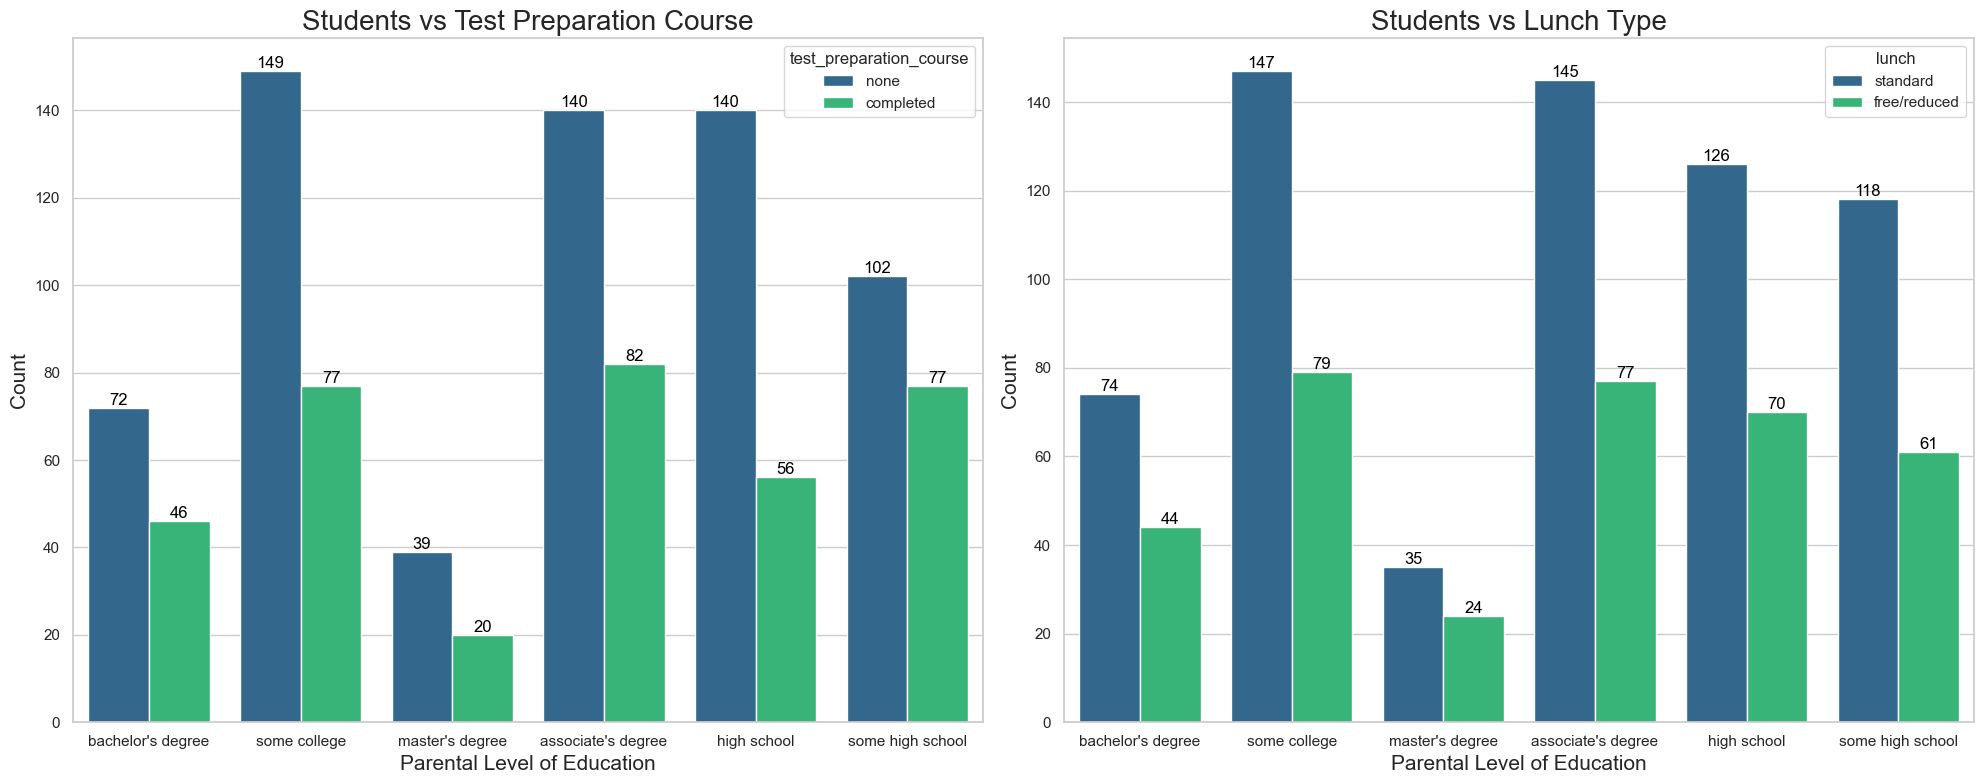

In [54]:
# Set the style
sns.set(style='whitegrid')

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot for test preparation course
sns.countplot(x='parental_level_of_education', hue='test_preparation_course', data=df, palette='viridis', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', fontsize=20)
ax[0].set_xlabel('Parental Level of Education', fontsize=15)
ax[0].set_ylabel('Count', fontsize=15)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

# Plot for lunch
sns.countplot(x='parental_level_of_education', hue='lunch', data=df, palette='viridis', saturation=0.95, ax=ax[1])
ax[1].set_title('Students vs Lunch Type', fontsize=20)
ax[1].set_xlabel('Parental Level of Education', fontsize=15)
ax[1].set_ylabel('Count', fontsize=15)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Insights
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

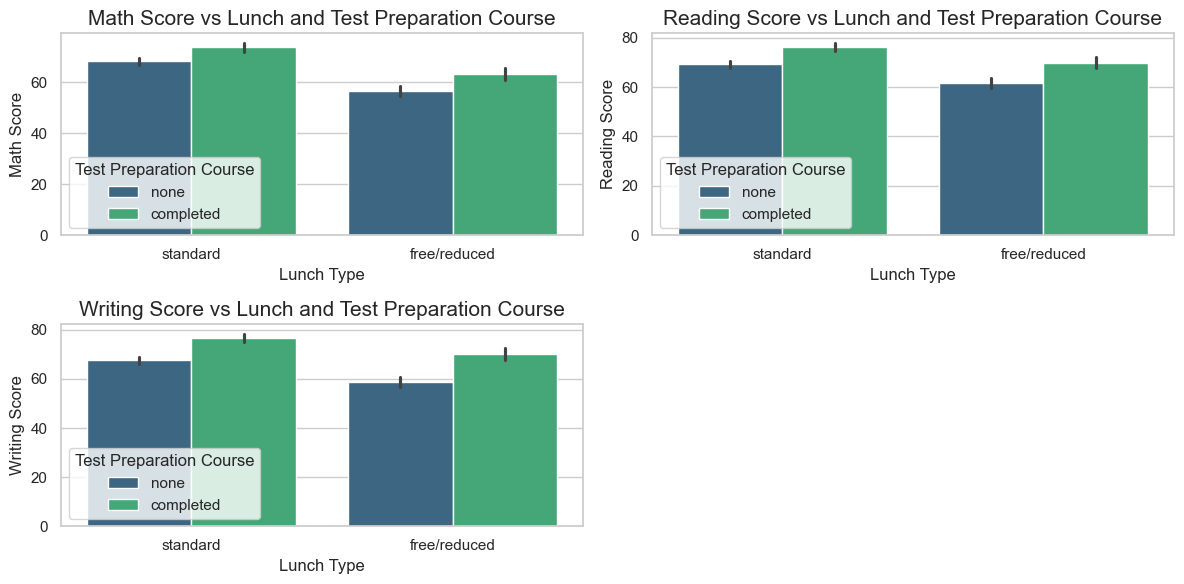

In [55]:

# Set the style
sns.set(style='whitegrid')

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Plot for Math score
plt.subplot(2, 2, 1)
sns.barplot(x='lunch', y='math_score', hue='test_preparation_course', data=df, palette='viridis')
plt.title('Math Score vs Lunch and Test Preparation Course', fontsize=15)
plt.xlabel('Lunch Type', fontsize=12)
plt.ylabel('Math Score', fontsize=12)
plt.legend(title='Test Preparation Course')

# Plot for Reading score
plt.subplot(2, 2, 2)
sns.barplot(x='lunch', y='reading_score', hue='test_preparation_course', data=df, palette='viridis')
plt.title('Reading Score vs Lunch and Test Preparation Course', fontsize=15)
plt.xlabel('Lunch Type', fontsize=12)
plt.ylabel('Reading Score', fontsize=12)
plt.legend(title='Test Preparation Course')

# Plot for Writing score
plt.subplot(2, 2, 3)
sns.barplot(x='lunch', y='writing_score', hue='test_preparation_course', data=df, palette='viridis')
plt.title('Writing Score vs Lunch and Test Preparation Course', fontsize=15)
plt.xlabel('Lunch Type', fontsize=12)
plt.ylabel('Writing Score', fontsize=12)
plt.legend(title='Test Preparation Course')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

### Checking for outliers

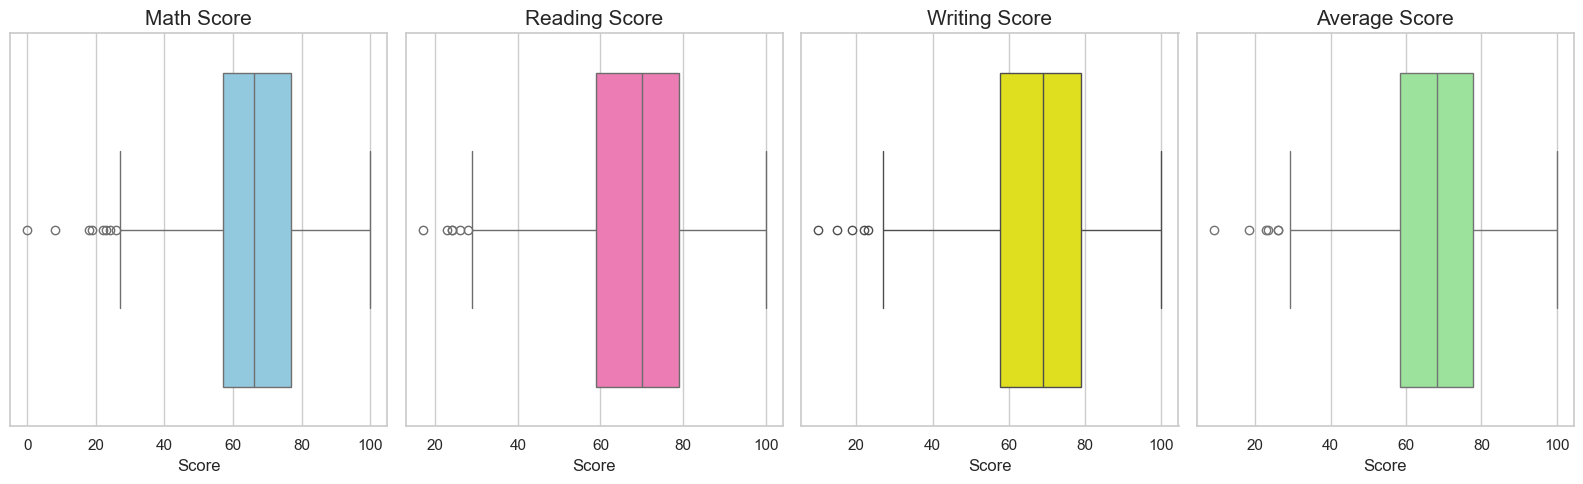

In [56]:
# Set the style
sns.set(style='whitegrid')

# Create a figure with subplots
plt.figure(figsize=(16, 5))

# Plot for Math score
plt.subplot(1, 4, 1)
sns.boxplot(x=df['math_score'], color='skyblue')
plt.title('Math Score', fontsize=15)
plt.xlabel('Score')
plt.ylabel('')

# Plot for Reading score
plt.subplot(1, 4, 2)
sns.boxplot(x=df['reading_score'], color='hotpink')
plt.title('Reading Score', fontsize=15)
plt.xlabel('Score')
plt.ylabel('')

# Plot for Writing score
plt.subplot(1, 4, 3)
sns.boxplot(x=df['writing_score'], color='yellow')
plt.title('Writing Score', fontsize=15)
plt.xlabel('Score')
plt.ylabel('')

# Plot for Average score
plt.subplot(1, 4, 4)
sns.boxplot(x=df['average'], color='lightgreen')
plt.title('Average Score', fontsize=15)
plt.xlabel('Score')
plt.ylabel('')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

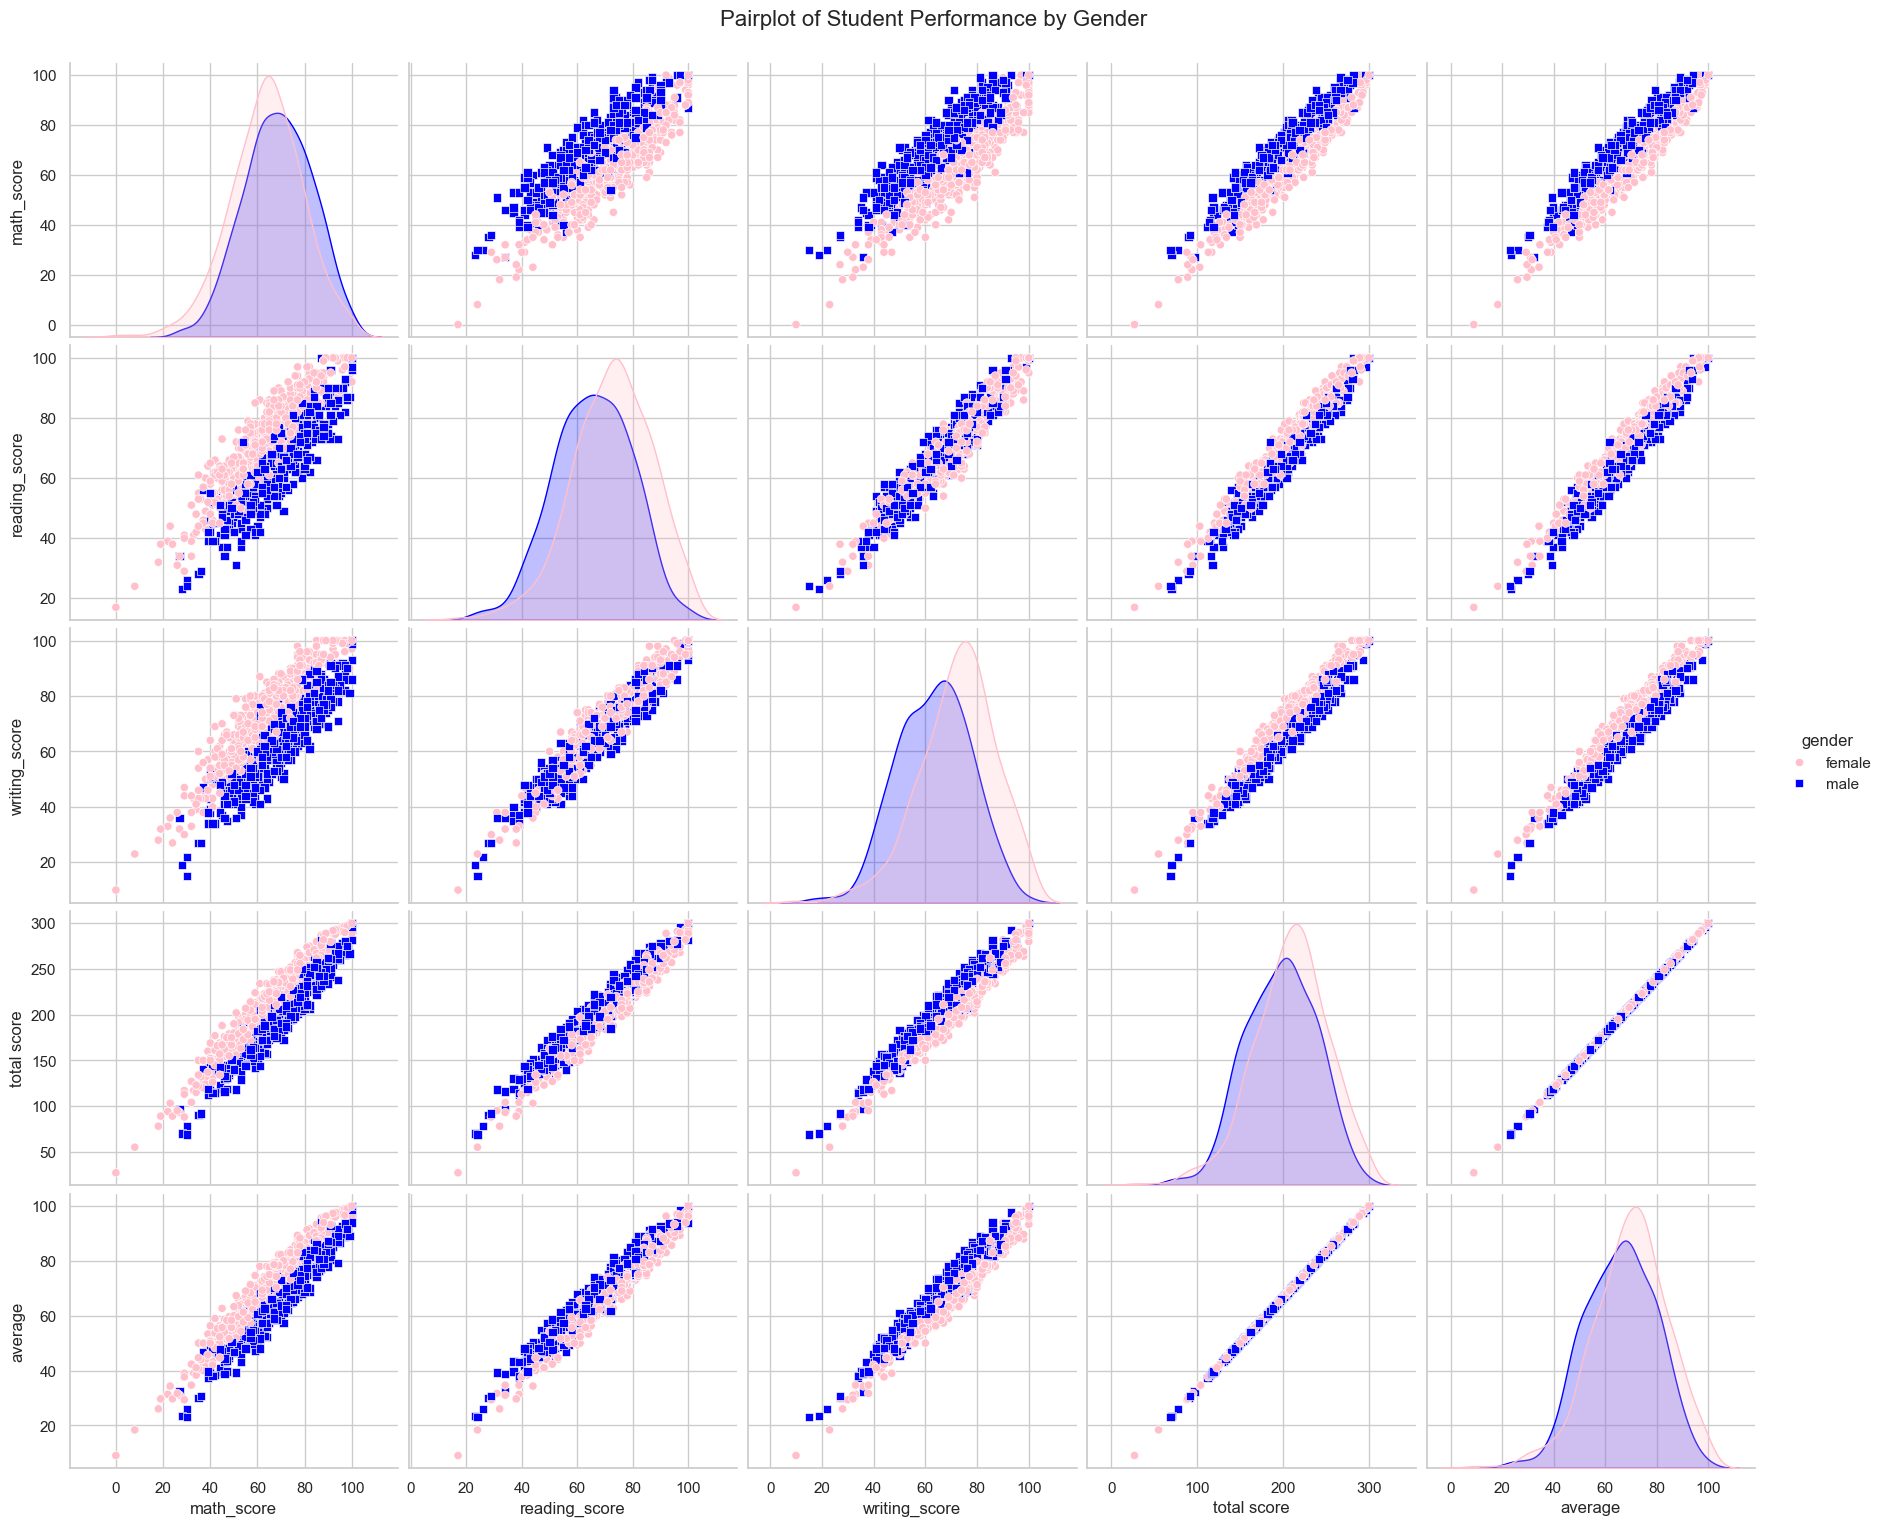

In [58]:
# Set the style
sns.set(style='whitegrid')

# Define custom palette
palette = {'male': 'blue', 'female': 'pink'}

# Create a pairplot with custom palette and other settings
sns.pairplot(df, hue='gender', palette=palette, diag_kind='kde', markers=['o', 's'], height=3, aspect=1.2)

# Set title
plt.suptitle('Pairplot of Student Performance by Gender', y=1.02, fontsize=16)

# Show the plot
plt.show()